In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as mf
import seaborn as sns

In [105]:
df = pd.read_csv('train.csv')

In [52]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [53]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [54]:
df.duplicated().sum()

0

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [56]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [9]:
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['day'] = pd.to_datetime(df['datetime']).dt.day
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df['weekday'] = pd.to_datetime(df['datetime']).dt.weekday

In [58]:
# 不同年份各季节共享单车使用量

In [59]:
df_season = df.groupby(['season','year'])['count'].sum()
df_season_unstack = df_season.unstack()
df_season_unstack.columns = ['2011','2012']
df_season_unstack

,2011,2012
season,,
1,95131,217367
2,220006,368276
3,255248,385414
4,211594,332440


In [60]:
x1 = df_season_unstack.index
y1 = df_season_unstack['2011'].values
y2 = df_season_unstack['2012'].values

Text(0.5, 1.0, '2011-2012年不同季节共享单车使用量折线图')

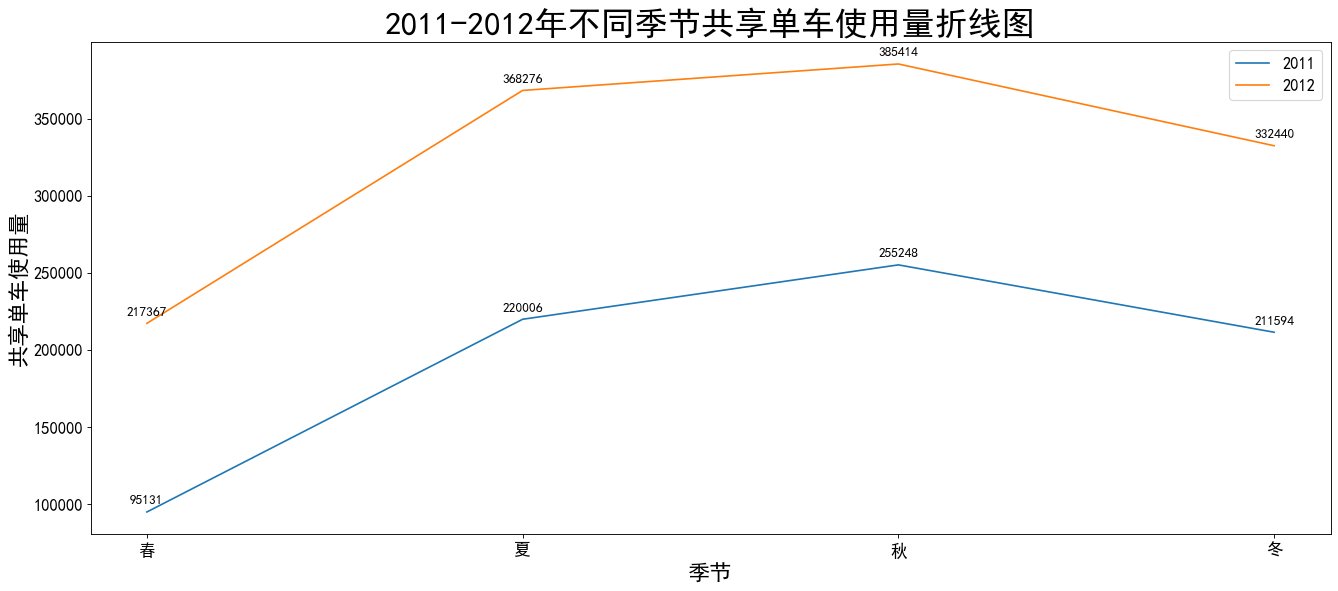

In [61]:
picture_size = plt.figure(figsize = (20,8),dpi =80)  #设置图形大小
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
_xticks = ['春','夏','秋','冬']
x1 = list(x1)
plt.xticks(x1,_xticks,size = 15)


plt.plot(x1,y1,label='2011')
plt.plot(x1,y2,label='2012')

for i,j in zip(x1,y1):
    plt.text(i,j+5000,'%s'%j,ha= 'center',size = 12)
for i,j in zip(x1,y2):
    plt.text(i,j+5000,'%s'%j,ha= 'center',size = 12)

plt.legend()
plt.xlabel('季节',size = 20)
plt.ylabel('共享单车使用量',size = 20)
plt.title('2011-2012年不同季节共享单车使用量折线图',size = 30)

In [62]:
  # 夏秋两季用车量较高，可以加大投放

C:\Users\张子豪\AppData\Local\Temp\ipykernel_13956\940200238.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x = 'hour',y = 'count',hue = 'weekday',data = df_hour_weekday,ci=None,palette='Spectral')


<AxesSubplot: xlabel='hour', ylabel='count'>

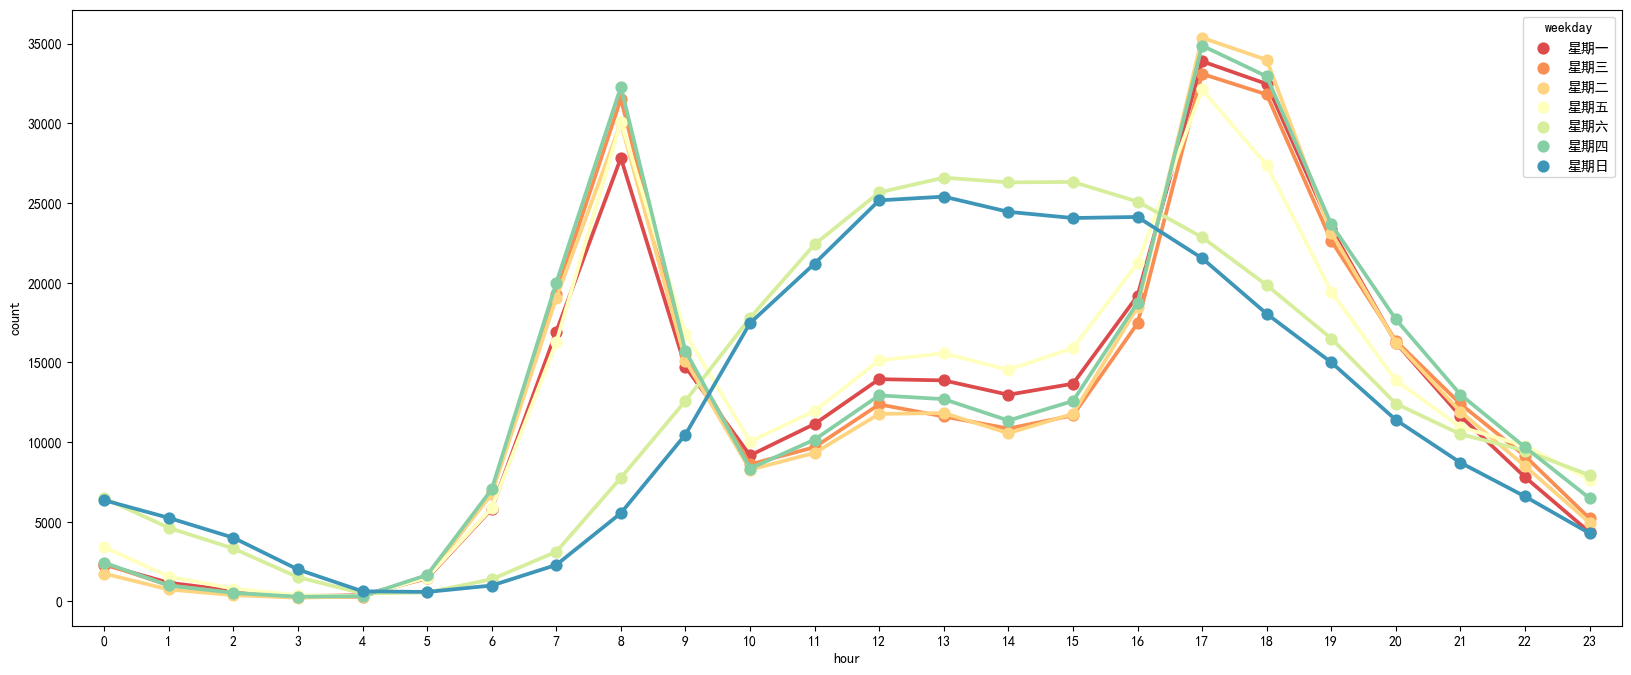

In [6]:
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(20,8))
dict1={0:'星期一',1:'星期二',2:'星期三',3:'星期四',4:'星期五',5:'星期六',6:'星期日'}
df['weekday']=df['weekday'].map(dict1)
df_hour_weekday = df.groupby(['hour','weekday'])['count'].sum().reset_index()
sns.pointplot(x = 'hour',y = 'count',hue = 'weekday',data = df_hour_weekday,ci=None,palette='Spectral')

In [64]:
#     工作日与周末分布有不同的分布规律，分别分析  

C:\Users\张子豪\AppData\Local\Temp\ipykernel_13956\2697455967.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x = 'hour',y = 'count',hue = 'workingday',data = df_working,ci=None,palette='Spectral')


<AxesSubplot: xlabel='hour', ylabel='count'>

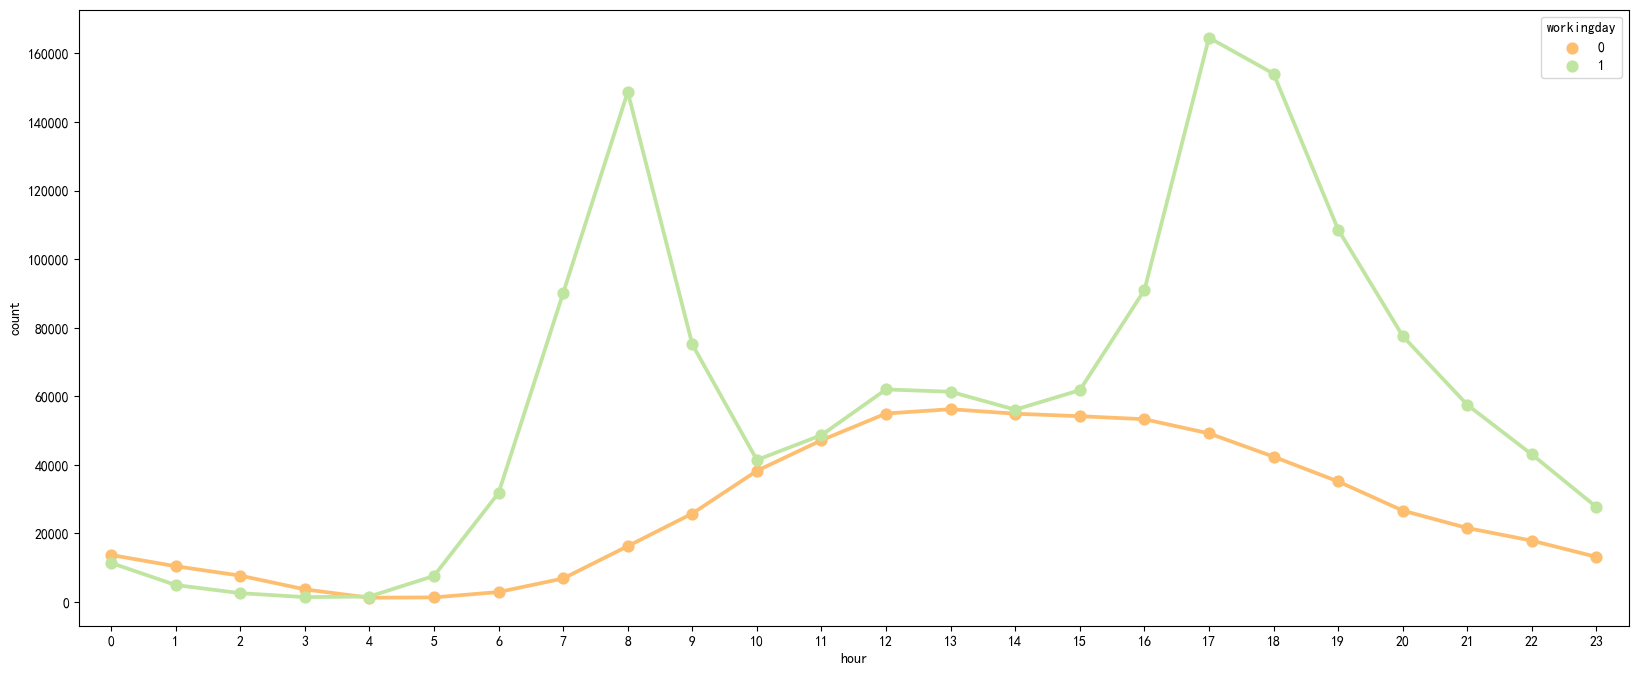

In [34]:
plt.figure(figsize=(20,8))
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False
df_working = df.groupby(['workingday','hour'])['count'].sum().reset_index()
dict2 = {0:'周末',1:'工作日'}
df['workingday'] = df['workingday'].map(dict2)
sns.pointplot(x = 'hour',y = 'count',hue = 'workingday',data = df_working,ci=None,palette='Spectral')

In [66]:
 # 工作日在上下班用车量较高，周末用车较为平缓，大多集中在10-16之间

In [67]:
# 总体用户喜好在那一时间段使用共享单车

Text(0.5, 1.0, '用户总体每天0-23时共享单车使用量条形图')

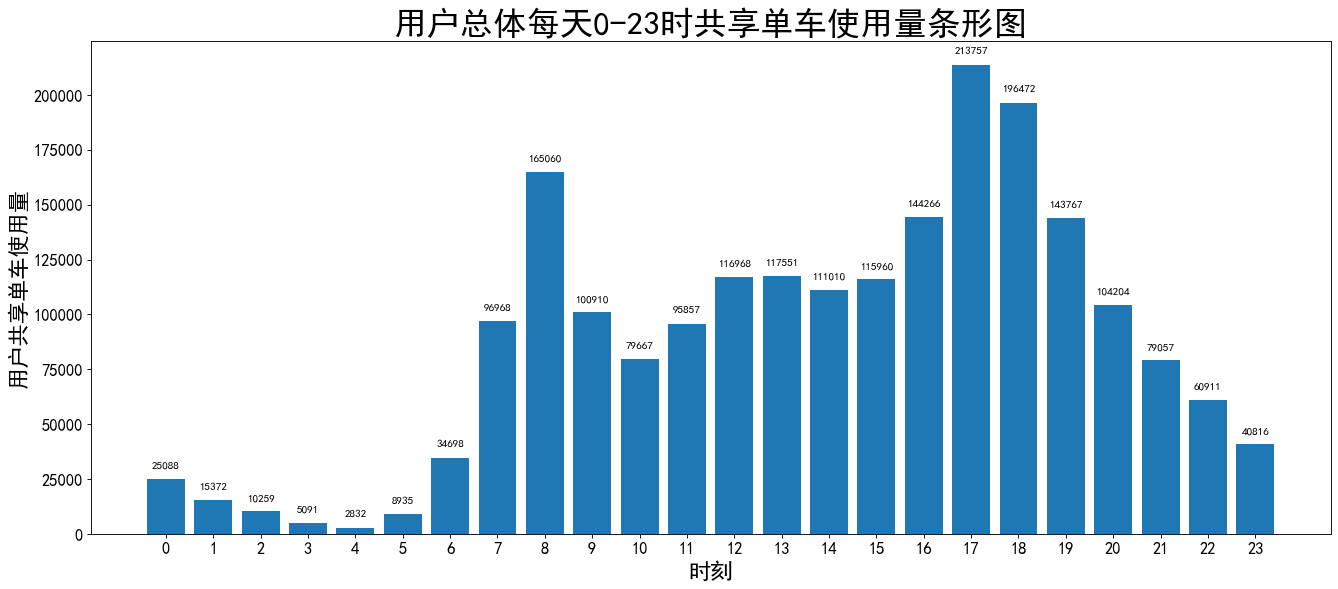

In [68]:
plt.figure(figsize = (20,8),dpi =80)

df_hour = df.groupby('hour')['count'].sum()
x1 = list(df_hour.index)
y1 = df_hour.values

plt.xticks(range(len(x1)),x1)
plt.bar(x1,y1)

for i,j in zip(x1,y1):
    plt.text(i,j+5000,"%s"%j,ha= 'center',size = 10)
plt.xlabel('时刻',size = 20)
plt.ylabel('用户共享单车使用量',size = 20)
plt.title('用户总体每天0-23时共享单车使用量条形图',size = 30)

In [69]:
# 用户在工作日or非工作日使用量

([<matplotlib.patches.Wedge at 0x13f32738400>,
 [Text(-0.9842323421723451, -0.49120942236681503, '周末'),
  Text(1.0737080598138395, 0.53586472387236, '工作日')],
 [Text(-0.5368540048212791, -0.2679324122000809, '31.4%'),
  Text(0.626329701558073, 0.31258775559220997, '68.6%')])

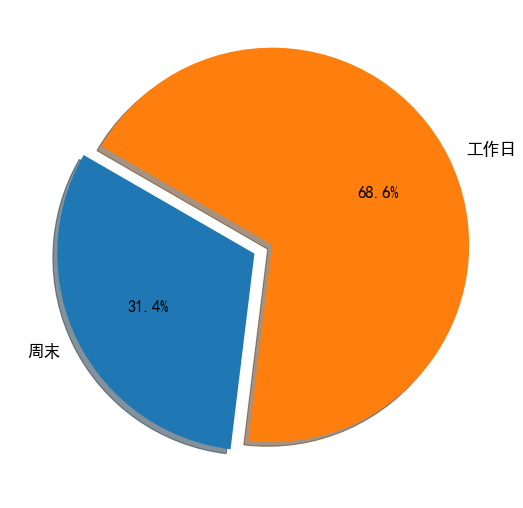

In [70]:
picture_size = plt.figure(figsize = (20,8),dpi =80)
plt.rcParams['font.size'] = 15.0  # 字体大小
plt.rcParams['font.sans-serif'] = ['SimHei']

df_workornot = df.groupby('workingday')['count'].sum()
x1 = df_workornot.index
y1 = df_workornot.values
label = ['周末','工作日']
explode = [0,0.1]   # 每个饼块相对于饼圆半径的偏移距离
plt.pie(y1,explode = explode,labels = label,autopct = "%1.1f%%",shadow = True,startangle = 150)

In [71]:
# 每周单日共享单车使用量

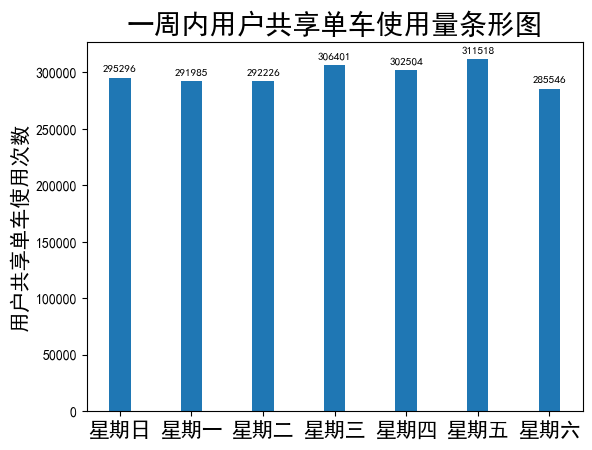

In [17]:
df_each_day = df.groupby('weekday')['count'].sum()
x1 = list(df_each_day.index)
y1 = df_each_day.values
_xticks = ['星期日','星期一','星期二','星期三','星期四','星期五','星期六']
plt.xticks(x1,_xticks,size = 15)

plt.bar(x1,y1,width = 0.3)
plt.ylabel('用户共享单车使用次数',size = 15)
plt.title('一周内用户共享单车使用量条形图',size= 20)

for i,j in zip(x1,y1):
    plt.text(i,j+5000,"%s"%j,ha = 'center',size = 8)

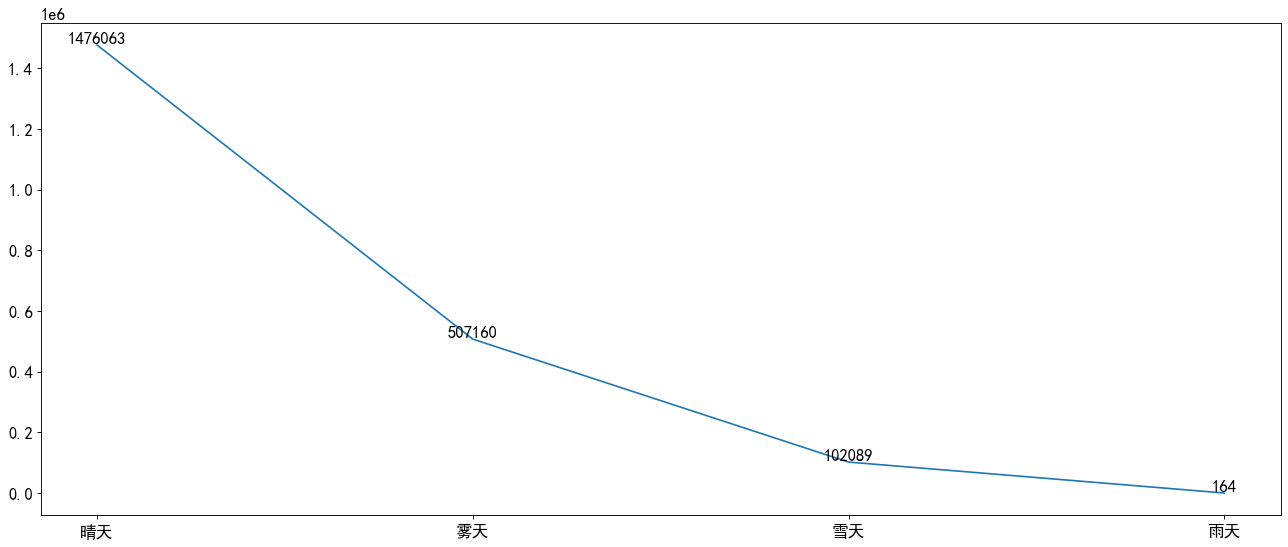

In [82]:
picture_size = plt.figure(figsize = (20,8),dpi =80)  #设置图形大小
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签

df_weather = df.groupby('weather')['count'].sum()

_xticks = ['晴天','雾天','雪天','雨天']


x1 = list(df_weather.index)
y1 = df_weather.values

plt.xticks(x1,_xticks,size =15)


plt.plot(x1,y1,label = '共享单车使用量')

for i,j in zip(x1,y1):
    plt.text(i,j+5000,'%s'%j,ha="center")

In [85]:
a = []
for i in df['temp']:
    a.append(i)

In [86]:
for i in a :
    if i < 5 :
        a[a.index(i)] = '5 <'
    elif  5<=i<10:
        a[a.index(i)] = '5~10'
    elif  10<=i<15:
        a[a.index(i)] = '10~15'
    elif  15<=i<20:
        a[a.index(i)] = '15~20'   
    elif  20<=i<25:
        a[a.index(i)] = '20~25'
    elif  25<=i<30:
        a[a.index(i)] = '25~30'
    elif  30<=i<35:
        a[a.index(i)] = '30~35'
    else:
        a[a.index(i)] = '>35'

In [87]:
df['temp'] = a

In [88]:
df_temp = df.groupby('temp')['count'].sum()

In [89]:
df_temp_frame = df_temp.to_frame()
df_temp_frame['order'] = [3,4,5,6,7,1,2,8]
df_temp_frame.sort_values(by = 'order',inplace = True)
df_temp_frame

,count,order
temp,,
5 <,6871,1
5~10,85270,2
10~15,281255,3
15~20,327978,4
20~25,436728,5
25~30,531537,6
30~35,351600,7
>35,64237,8


In [90]:
df_temp_frame.drop(columns = ['order'],inplace = True)
df_temp_frame

,count
temp,
5 <,6871
5~10,85270
10~15,281255
15~20,327978
20~25,436728
25~30,531537
30~35,351600
>35,64237


Text(0.5, 1.0, '各温度段下共享单车使用量条形图')

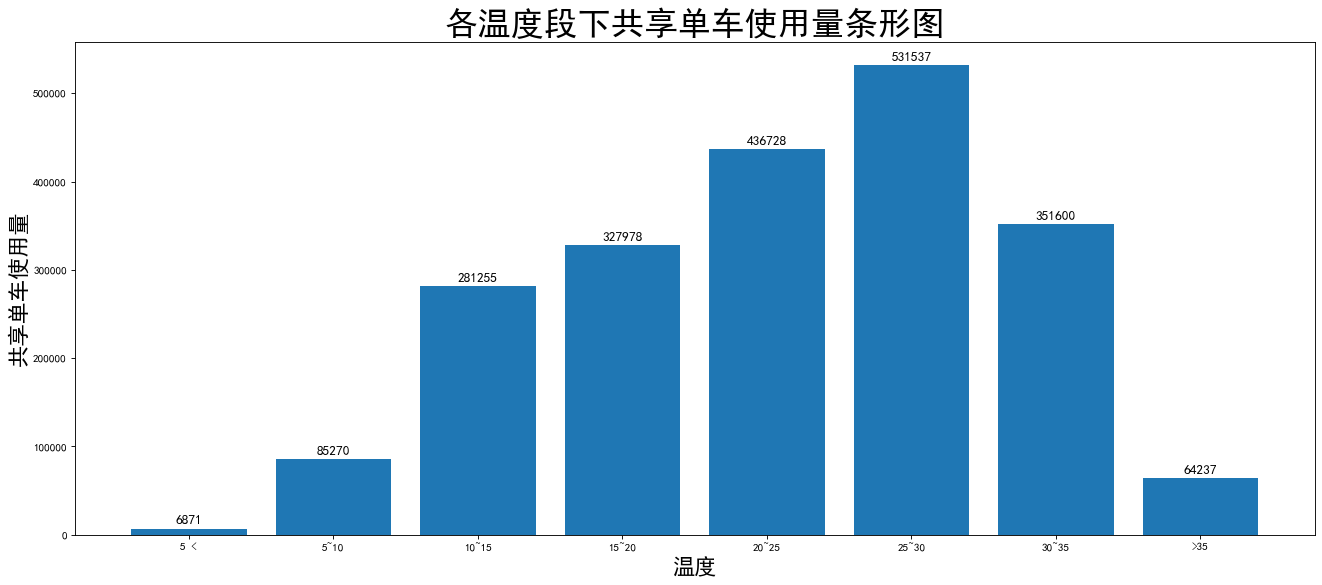

In [91]:
picture_size=plt.figure(figsize=(20,8),dpi=80)
plt.rcParams['font.sans-serif']=['SimHei']

x1 = list(df_temp_frame.index)
y1 = []

for i in df_temp_frame.values:    #dataframe 数据要取两次变成列表
    for j in i:
        y1.append(j)
plt.xticks(range(len(x1)),x1)
plt.bar(x1,y1)

for i,j in zip(x1,y1):
    plt.text(i,j+5000,'%s'%j,ha = 'center',size = 12)
    
plt.xlabel('温度',size = 20)
plt.ylabel('共享单车使用量',size=20)
plt.title('各温度段下共享单车使用量条形图',size=30)

In [92]:
# 用户倾向于在什么湿度段下使用共享单车

In [106]:
b=[]
for i in df['humidity']:
    b.append(i)
for i in b:
    if i<10:
        b[b.index(i)]='10<'
    elif 10<=i<20:
        b[b.index(i)] = '10~20'
    elif 20 <= i < 30:
        b[b.index(i)]= '20~30'
    elif 30 <= i < 40:
        b[b.index(i)] = '30~40'
    elif 40 <= i < 50:
        b[b.index(i)] = '40~50'
    elif 50 <= i < 60:
        b[b.index(i)] = '50~60'
    elif 60 <= i < 70:
        b[b.index(i)] = '60~70'
    elif 70 <= i < 80:
        b[b.index(i)] = '70~80'
    elif 80 <= i < 90:
        b[b.index(i)] = '80~90'
    else:
        b[b.index(i)] = '>90'
df['humidity']=b

In [109]:
df_humidity = df.groupby('humidity')['count'].sum().sort_index(ascending = False)

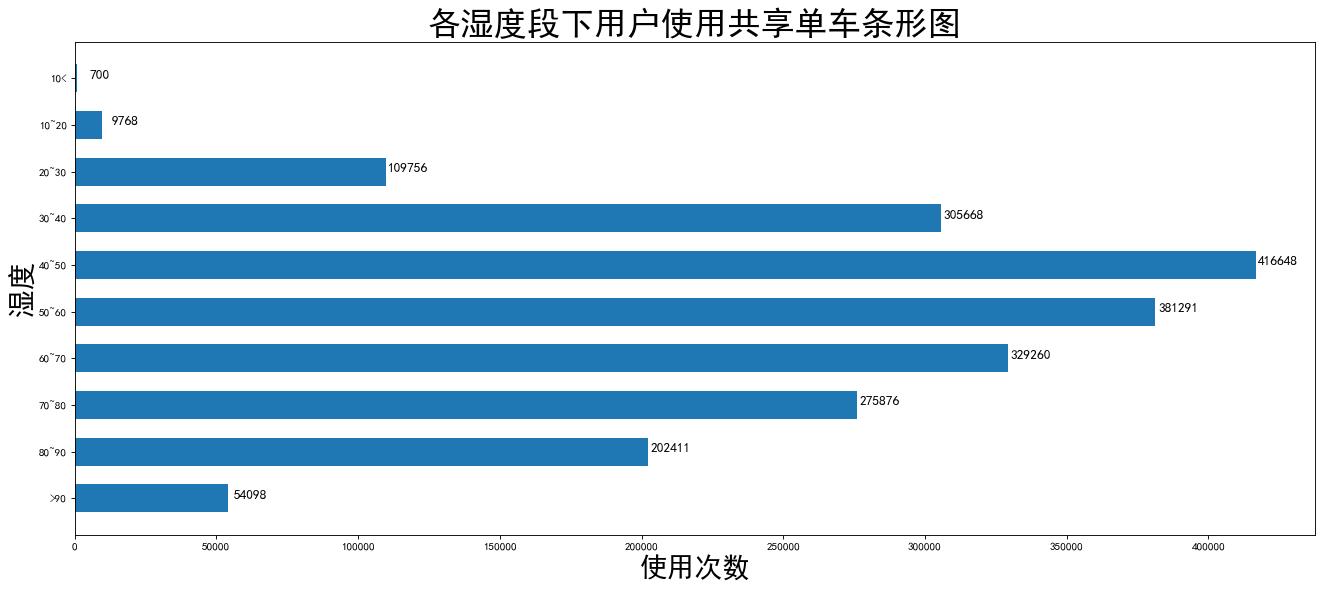

In [118]:
x1 = list(df_humidity.index)
y1 = df_humidity.values
picture_size=plt.figure(figsize=(20,8),dpi=80)#设置图形大小
plt.rcParams['font.sans-serif']=['SimHei']
plt.barh(x1,y1,height = 0.6)
plt.xlabel('使用次数',size=25)
plt.ylabel('湿度',size=25)
plt.title('各湿度段下用户使用共享单车条形图',size=30)
for i,j in zip(y1,x1):
    plt.text(i+8000,j,'%s'%i,ha = 'center',size = 12)

In [120]:
c = []

for i in df['windspeed']:
    c.append(i)
    
for i in c:
    if i<10:
        c[c.index(i)]='10<'
    elif 10<=i<20:
        c[c.index(i)] = '10~20'
    elif 20 <= i < 30:
        c[c.index(i)]= '20~30'
    elif 30 <= i < 40:
        c[c.index(i)] = '30~40'
    elif 40 <= i < 50:
        c[c.index(i)] = '40~50'
    else:
        c[c.index(i)] = '50~60'
df['windspeed']=c

<BarContainer object of 6 artists>

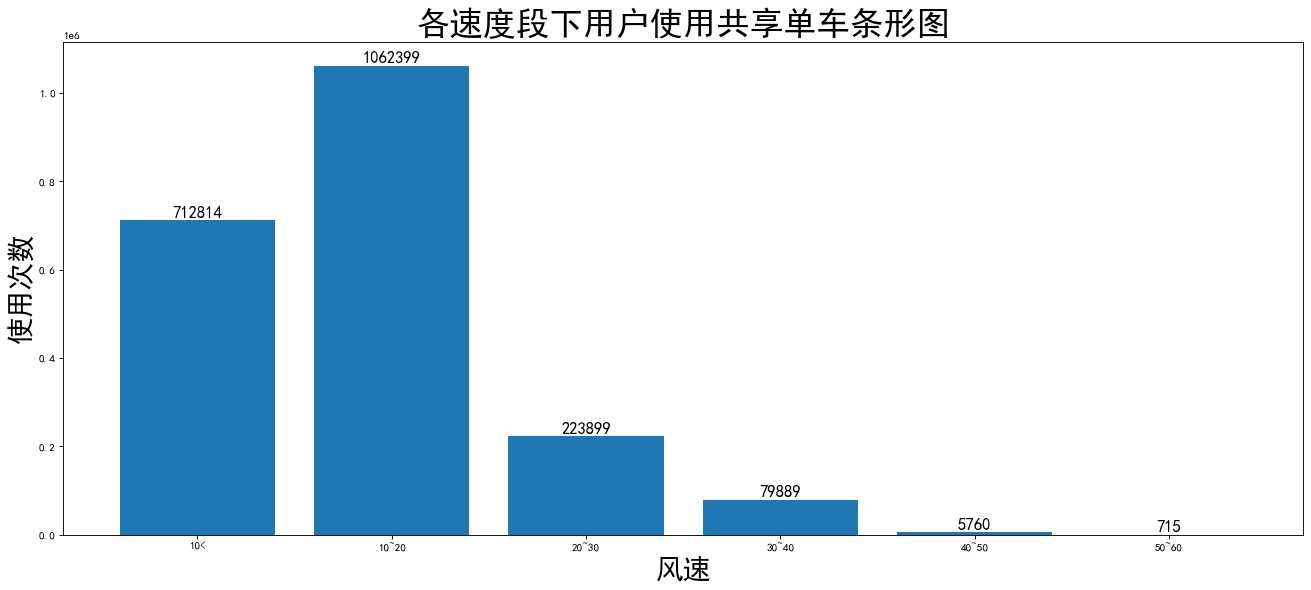

In [124]:
df_windspeed = df.groupby('windspeed')['count'].sum()
picture_size=plt.figure(figsize=(20,8),dpi=80)
x1 = df_windspeed.index
y1 = df_windspeed.values
for i,j in zip(x1,y1):
    plt.text(i,j+5000,'%s' % j, ha='center',size=15)
plt.xlabel('风速',size=25)
plt.ylabel('使用次数',size=25)
plt.title('各速度段下用户使用共享单车条形图',size=30)
plt.bar(x1,y1)

([<matplotlib.patches.Wedge at 0x20a2ce1d570>,
 [Text(-0.987370884165027, 0.48486981459271405, '非注册用户'),
  Text(1.0771318488726895, -0.5289489390707783, '注册用户')],
 [Text(-0.5385659368172874, 0.26447444432329853, '18.8%'),
  Text(0.6283269118424021, -0.3085535477912873, '81.2%')])

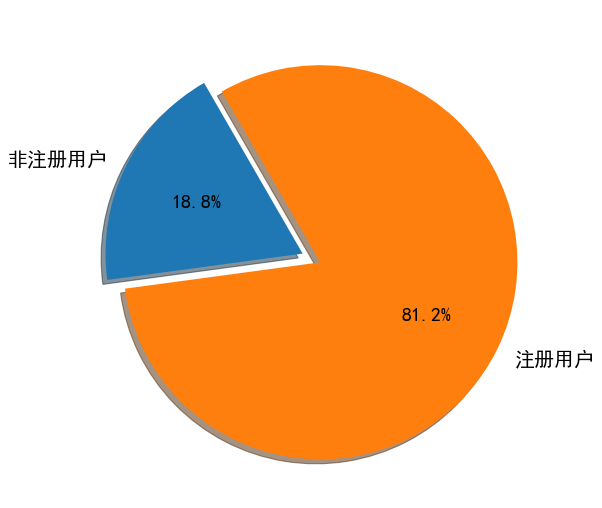

In [133]:
picture_size=plt.figure(figsize=(20,8),dpi=80)
df_casual = df['casual'].values.sum()
df_registered = df['registered'].values.sum()
d = [df_casual,df_registered]
explode = [0,0.1]
plt.rcParams['font.size'] = 18
labels = ['非注册用户','注册用户']
plt.pie(d,labels = labels,explode = explode,autopct = '%1.1f%%',shadow = True,startangle = 120)